In [3]:
from platform import python_version
print(python_version())

3.10.11


# Deep Learning
## Introduction
- Subfield of ML which emphasis on learning successive layers of increasingly meaningful representations.
- The **deep** isn't a reference to any kind of deeper understanding achieved by the approach. It stands for the idea of successive layers of representations.
- The layers contributed to a model of the data is called the *depth* of the model.
- Other appropriate names: layered/hierarchical representations learning.
- Given the computing power nowadays, the deep learning may involves hundreds of succesive layers of representations where they are learned automatically.
- Three technical forces which driving advances in DL/ML nowadays: Hardware, Data and Algorithms.


In [4]:
import os
os.chdir('../')

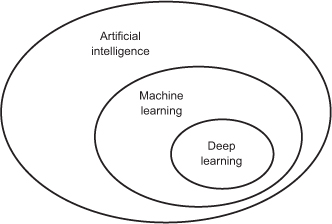

In [5]:
from IPython.display import Image
Image('images/01fig01.jpg', width =300)

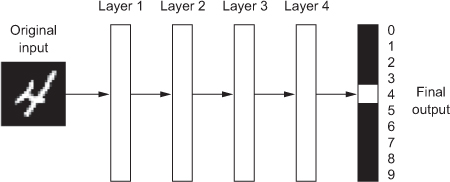

In [6]:
Image('images/01fig05.jpg', width =400)

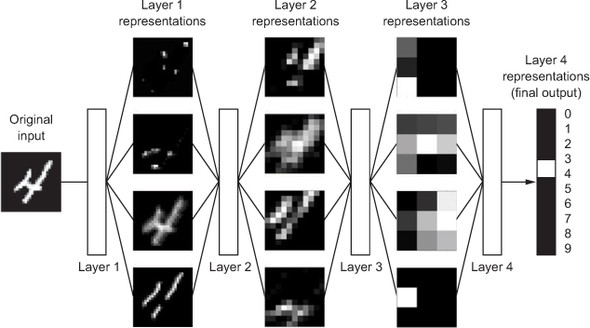

In [7]:
Image('images/01fig06_alt.jpg', width =400)

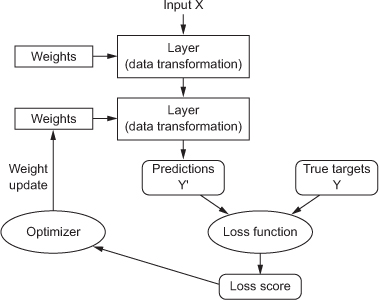

In [8]:
Image('images/01fig09.jpg', width =400)

## Applications (or rather achievements)
- Near-human-level image classification
- Near-human-level speech recognition
- Near-human-level handwriting transcription
- Improved machine translation
- Improved text-to-speech conversion
- Digital assistants such as Google Now and Amazon Alexa
- Near-human-level autonomous driving
- Improved ad targeting, as used by Google, Baidu, and Bing
- Improved search results on the web
- Ability to answer natural-language questions
- Superhuman Go playing

## Keras and Tensorflow
- Keras is a deep learning framework for Python that provides a convenient way to define and train almost any kind of deep learning model.
- Key features:
    - It allows the same code to run seamlessly on CPU or GPU.
    - It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
    - It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
    - It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.
- Keras doesn’t handle low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor library to do so, serving as the backend engine of Keras. Rather than choosing a single tensor library and tying the implementation of Keras to that library, Keras handles the problem in a modular way thus several different backend engines can be plugged seamlessly into Keras. Currently, the three existing backend implementations are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive Toolkit (CNTK) backend. 
- The typical Keras workflow:
    1. Define your training data: input tensors and target tensors.
    2. Define a network of layers (or model) that maps your inputs to your targets.
    3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
    4. Iterate on your training data by calling the fit() method of your model.

## A first look at a neural network

**Loading the MNIST dataset in Keras**

### Note
Tensorflow does not work with Python version 3.13 and above. So we need to install a previous version of Python.

Open cmd prompt and do these:
- Download and install the previous stable version of Python from here: https://www.python.org/downloads/windows/
- Open the cmd prompt, and enter this: py -3.11 -m pip install ipykernel
- After that, enter this: py -3.11 -m ipykernel install --user --name py311
- Open jupyter notebook, change the kernel on the top right corner

Run the following lines to ensure that the package will be installed on the selected kernel

import sys

!{sys.executable} -m pip install tensorflow

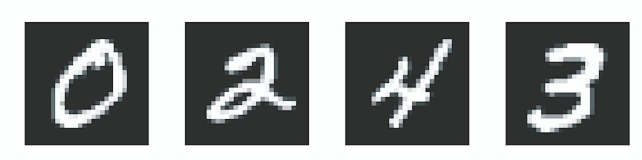

In [9]:
Image('images/figure_2-1.png', width =400)

In [10]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [16]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [18]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [19]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2635 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1069 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9882


**Using the model to make predictions**

In [21]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[1]

1/1 [==============================] - 0s 50ms/step


array([7.4619724e-09, 1.7488347e-06, 9.9999189e-01, 7.5993489e-07,
       5.4017205e-15, 2.3551117e-07, 4.3798826e-07, 4.3407870e-14,
       4.8473144e-06, 1.5048997e-13], dtype=float32)

In [22]:
predictions[1].argmax()

2

In [23]:
predictions[1][2]

0.9999919

In [24]:
test_labels[1]

2

**Evaluating the model on new data**

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 623us/step - loss: 0.0620 - accuracy: 0.9805
test_acc: 0.9804999828338623


## Classifying movie reviews: a binary classification example
- Classify movie reviews as positive or negative, based on the text content of the reviews.
- IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.
- The data has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

**Loading the IMDB dataset**

In [26]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 18s 1us/step


- The argument num_words = 10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.
- The variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
- train_labels and test_labels are lists of 0s and 1s, where 0 stands for “negative” and 1 stands for “positive”:

In [27]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [28]:
train_labels[0]

1

- Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:



In [29]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [30]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [31]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

- You can’t feed lists of integers into a neural network. You have to turn your lists into vectors. There are two ways to do that:

1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the “embedding” layer, which we’ll cover in detail later in the book).
2. One-hot-encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence $[3, 5]$ into a 10,000-dimensional vector that would be all zeros except for indices 3 and 5, which would be ones. Then you could use as the first layer in your network a dense layer, capable of handling floating-point vector data.

**Encoding the integer sequences via multi-hot encoding**

In [32]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [34]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

- The final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”, i.e. how likely the review is to be positive). 
- A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid “squashes” arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

**Compiling the model**
- Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the binary_crossentropy loss. 
- It isn’t the only viable choice: you could use, for instance, mean_squared_error. But crossentropy is usually the best choice when you are dealing with models that output probabilities. 
- Crossentropy is a quantity from the field of Information Theory, that measures the “distance” between probability distributions, or in our case, between the ground-truth distribution and our predictions.

In [36]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**
- We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. 
- At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5763 - accuracy: 0.7457 - val_loss: 0.4596 - val_accuracy: 0.8336
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3732 - accuracy: 0.8856 - val_loss: 0.3425 - val_accuracy: 0.8793
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2738 - accuracy: 0.9127 - val_loss: 0.3024 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2195 - accuracy: 0.9271 - val_loss: 0.2800 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1849 - accuracy: 0.9397 - val_loss: 0.2746 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1571 - accuracy: 0.9497 - val_loss: 0.2797 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1360 - accuracy: 0.9579 - val_loss: 0.2898 - val_accuracy: 0.8866
Epoch 8/20
30/30 [=

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

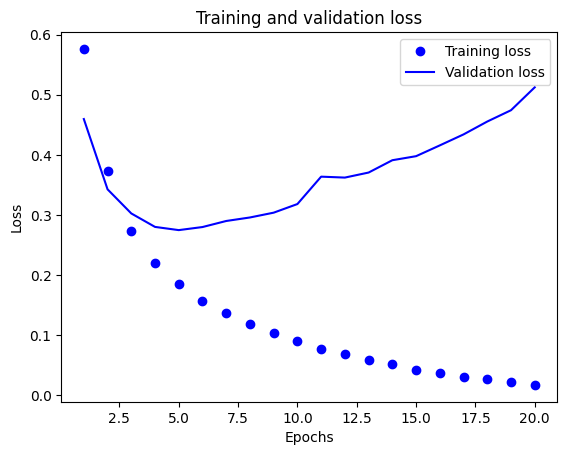

In [43]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

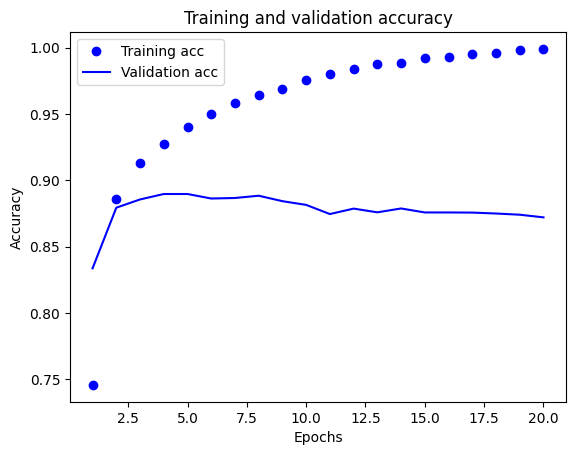

In [44]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. 
- That’s what you would expect when running a gradient-descent optimization – the quantity you’re trying to minimize should be less with every iteration. 
- But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. - This is an example of a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before (**overfitting**)
- After the second epoch, you’re over-optimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.
- To prevent overfitting, you could stop training after three epochs. 

**Retraining a model from scratch**

In [45]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 5ms/step - loss: 0.4674 - accuracy: 0.8106
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2734 - accuracy: 0.9026
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2134 - accuracy: 0.9221
Epoch 4/4
782/782 [==============================] - 1s 633us/step - loss: 0.2851 - accuracy: 0.8863


**loss and accuracy**

In [46]:
results

[0.2850790023803711, 0.8862800002098083]

### Using a trained model to generate predictions on new data

In [47]:
model.predict(x_test)

782/782 [==============================] - 0s 576us/step


array([[0.21201706],
       [0.9995721 ],
       [0.7689483 ],
       ...,
       [0.12912369],
       [0.08643377],
       [0.57970953]], dtype=float32)

## Classifying newswires: a multiclass classification example

### The Reuters dataset

- There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

**Loading the Reuters dataset**
- Like with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.
- And each example is a list of integers (word indices).

In [48]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [49]:
len(train_data)

8982

In [50]:
len(test_data)

2246

In [51]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [52]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [53]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [54]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [55]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [56]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

- This classification problem looks very similar to the previous movie review classification problem: in both cases, we are trying to classify short snippets of text. 
- There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the dimensionality of the output space is much larger.

- In a stack of Dense layers like what we were using, each layer can only access information present in the output of the previous layer. 
- If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an "information bottleneck". 
- In the previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

- For this reason we will use larger layers. Let's go with 64 units:

**Model definition**

In [57]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

There are two other things you should note about this architecture:

1. We are ending the network with a Dense layer of size 46. This means that for each input sample, our network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
2. The last layer uses a softmax activation. You have already seen this pattern in the MNIST example. It means that the network will output a probability distribution over the 46 different output classes, i.e. for every input sample, the network will produce a 46-dimensional output vector where output $[i]$ is the probability that the sample belongs to class $i$. The 46 scores will sum to 1.


- The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. 
- By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

**Compiling the model**

In [58]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [59]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [60]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 2.7019 - accuracy: 0.4743 - val_loss: 1.8254 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 1.5545 - accuracy: 0.6813 - val_loss: 1.3680 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.1978 - accuracy: 0.7387 - val_loss: 1.1905 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.9860 - accuracy: 0.7876 - val_loss: 1.0909 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8262 - accuracy: 0.8210 - val_loss: 1.0069 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6937 - accuracy: 0.8479 - val_loss: 0.9530 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5856 - accuracy: 0.8723 - val_loss: 0.9158 - val_accuracy: 0.7990
Epoch 8/20
16/16 

**Plotting the training and validation loss**

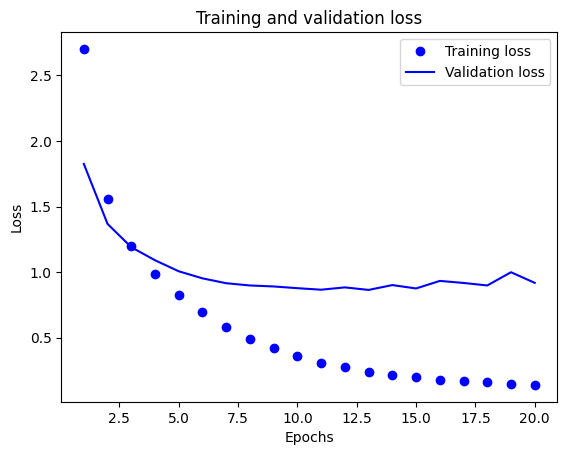

In [61]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

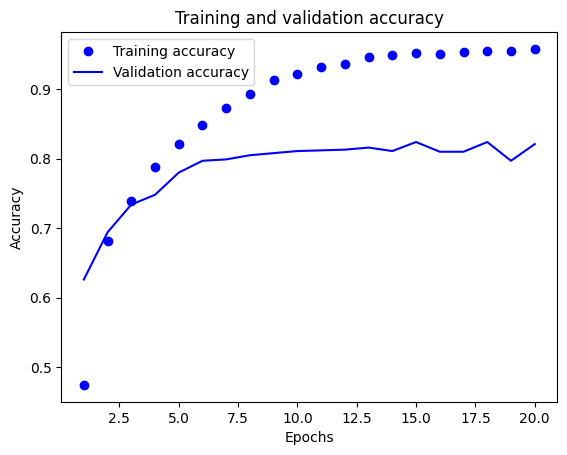

In [62]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- It seems that the network starts overfitting after 8 epochs. 
- Let's train a new network from scratch for 8 epochs, then let's evaluate it on the test set:

**Retraining a model from scratch**

In [63]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 8ms/step - loss: 2.7493 - accuracy: 0.4709
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.5302 - accuracy: 0.6857
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 1.1551 - accuracy: 0.7537
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.9384 - accuracy: 0.8044
Epoch 5/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7790 - accuracy: 0.8350
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.6533 - accuracy: 0.8624
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5498 - accuracy: 0.8842
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.4645 - accuracy: 0.9035
Epoch 9/9
71/71 [==============================] - 0s 807us/step - loss: 0.9203 - accuracy: 0.7930


In [64]:
model.evaluate?

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs,
)
Docstring:
Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the `batch_size` arg.)

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
      - A generator or `keras.utils.Sequence` returning `(inputs,
        targets)` or `(inputs, targets, sa

**loss and accuracy**

In [65]:
results

[0.9202525615692139, 0.792965292930603]

- This approach reaches an accuracy of ~78%. 
- With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in this case it is closer to 19%, so this results seem pretty good, at least when compared to a random baseline:

In [66]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17898486197684774

### Generating predictions on new data

In [67]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 816us/step


In [68]:
predictions[0].shape

(46,)

In [69]:
np.sum(predictions[0])

1.0

In [70]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss
- another way to encode the labels would be to cast them as an integer tensor, like such:

In [71]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

- The only thing it would change is the choice of the loss function. The previous loss, `categorical_crossentropy`, expects the labels to follow a categorical encoding. 
- With integer labels, we should use `sparse_categorical_crossentropy`:

In [72]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [73]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 3.6908 - accuracy: 0.0604 - val_loss: 3.5159 - val_accuracy: 0.0460
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 3.2286 - accuracy: 0.0512 - val_loss: 2.9214 - val_accuracy: 0.0480
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 2.4065 - accuracy: 0.3066 - val_loss: 2.0429 - val_accuracy: 0.3890
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.7782 - accuracy: 0.4970 - val_loss: 1.6469 - val_accuracy: 0.6030
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.4788 - accuracy: 0.6302 - val_loss: 1.4745 - val_accuracy: 0.6630
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2923 - accuracy: 0.7022 - val_loss: 1.3757 - val_accuracy: 0.6900
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1533 - accuracy: 0.7244 - val_loss: 1.3113 - val_accuracy: 0.7040
Epoch 8/20
63/63 [==

## Predicting house prices: a regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [74]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [75]:
train_data.shape

(404, 13)

In [76]:
test_data.shape

(102, 13)

In [77]:
train_data[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

### Preparing the data

**Normalizing the data**

In [78]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [79]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [80]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [81]:
model.fit?

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_w

In [82]:
all_scores

[1.9219989776611328, 2.764298439025879, 2.5653867721557617, 2.4287266731262207]

In [83]:
np.mean(all_scores)

2.4201027154922485

**Saving the validation logs at each fold**

In [84]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [85]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

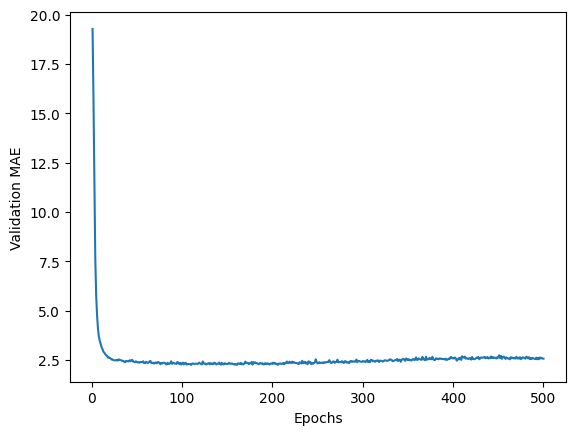

In [86]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

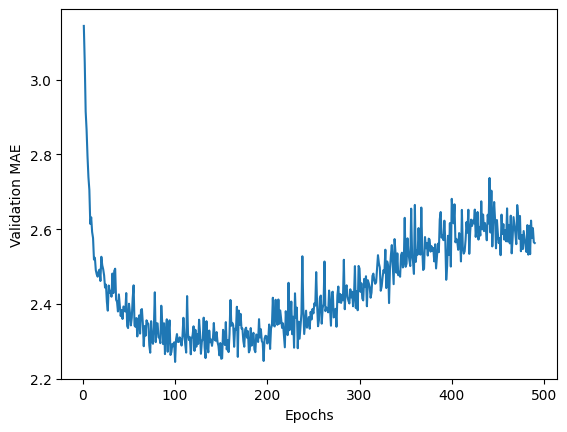

In [87]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [88]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 16.1228 - mae: 2.6276


In [89]:
test_mae_score

2.6276423931121826

### Generating predictions on new data

In [90]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 669us/step


array([9.252255], dtype=float32)

# Important types/concepts/approaches in deep learning:

![Deep learning concepts](https://i.imgur.com/EAl47rp.png)

- At a high-level, neural networks are either encoders, decoders, or a combination of both. 
    - Encoders find patterns in raw data to form compact, useful representations. 
    - Decoders generate new data or high-resolution useful infomation from those representations. 
- Deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. 
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc. 
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. See [this TF tutorial on text generation](https://www.tensorflow.org/tutorials/sequences/text_generation) for an example.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. 

## Classification of MNIST Dreams with Convolutional Neural Networks

Next, let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

In [91]:
pip install opencv-python

     ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/39.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/39.5 MB 1.3 MB/s eta 0:00:31
     --------------------------------------- 0.1/39.5 MB 939.4 kB/s eta 0:00:42
     --------------------------------------- 0.1/39.5 MB 787.7 kB/s eta 0:00:50
     --------------------------------------- 0.2/39.5 MB 857.5 kB/s eta 0:00:46
     --------------------------------------- 0.2/39.5 MB 901.1 kB/s eta 0:00:44
     --------------------------------------- 0.3/39.5 MB 862.0 kB/s eta 0:00:46
     --------------------------------------- 0.3/39.5 MB 853.3 kB/s eta 0:00:46
     --------------------------------------- 0.3/39.5 MB 846.5 kB/s eta 0:00:47
     --------------------------------------- 0.4/39.5 MB 843.6 kB/s eta 0:00:47
     --------------------------------------- 0.4/39.5 MB 859.0 kB


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


!{sys.executable} -m pip install seaborn

In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.12.0


In [5]:
# Set common constants
this_repo_url = 'https://github.com/lexfridman/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [6]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [7]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

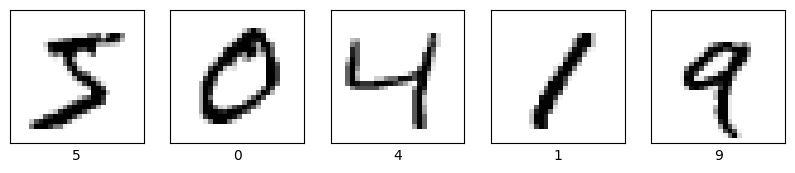

In [8]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [9]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [10]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [11]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1929 - accuracy: 0.9417
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0800 - accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0613 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0499 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0437 - accuracy: 0.9869


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.68% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [12]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. In our case, the accuracy is better at 99.19%! This is, in part, due to successful regularization accomplished with the Dropout layers.

### Make predictions

With the model trained, we can use it to make predictions about some images. Let's step outside the MNIST dataset for that and go with the beautiful high-resolution images generated by a mixture of CPPN, GAN, VAE. See [great blog post by hardmaru](http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/) for the source data and a description of how these morphed animations are generated:

![MNIST dream](https://i.imgur.com/OrUJs9V.gif)

1/1 [==============================] - 0s 10ms/step


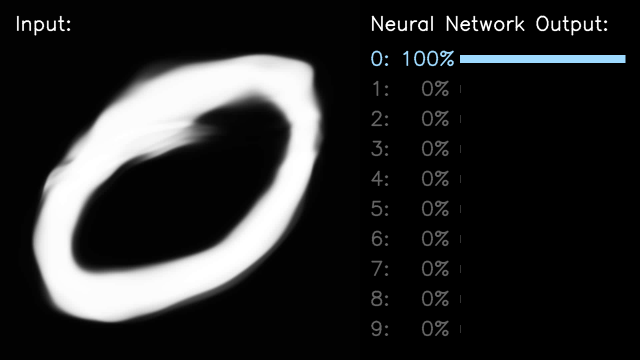

In [13]:
mnist_dream_path = 'images/mnist_dream.mp4'
mnist_prediction_path = 'images/mnist_dream_predicted.mp4'

# download the video if running in Colab
if not os.path.isfile(mnist_dream_path): 
    print('downloading the sample video...')
    vid_url = this_tutorial_url + '/' + mnist_dream_path
    
    mnist_dream_path = urllib.request.urlretrieve(vid_url)[0]
                                                                                                  
def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes() 
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

cap = cv2.VideoCapture(mnist_dream_path) 
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

# go through all the frames and run our classifier on the high res MNIST images as they morph from number to number
while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break
               
    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))
       
    #preprocess the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    img_proc = preprocess_images(img_proc)
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background

    net_in = np.expand_dims(img_proc, axis=0) # expand dimension to specify batch size of 1
    net_in = np.expand_dims(net_in, axis=3) # expand dimension to specify number of channels
    
    preds = model.predict(net_in)[0]
    guess = np.argmax(preds)
    perc = np.rint(preds * 100).astype(int)
    
    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))  
    
    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3        
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)
    
    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
    
    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)   
        
    y = 130
    for i, p in enumerate(perc):
        if i == guess: color = (255, 218, 158)
        else: color = (100, 100, 100)
            
        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)
        
        rect_start = 180
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)

        text = '{}: {:>3}%'.format(i, int(p))
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60
    
    # if you don't want to save the output as a video, set this to False
    save_video = True
    
    if save_video:
        if vw is None:
            codec = cv2.VideoWriter_fourcc(*'DIVX')
            vid_width_height = img.shape[1], img.shape[0]
            vw = cv2.VideoWriter(mnist_prediction_path, codec, 30, vid_width_height)
        # 15 fps above doesn't work robustly so we right frame twice at 30 fps
        vw.write(img)
        vw.write(img)
    
    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)
        
cap.release()
if vw is not None:
    vw.release()

The above shows the prediction of the network by choosing the neuron with the highest output. While the output layer values add 1 to one, these do not reflect well-calibrated measures of "uncertainty". Often, the network is overly confident about the top choice that does not reflect a learned measure of probability. 